In [1]:
#导入相关要使用的包
import random
import math
import matplotlib.pyplot as plt 

In [2]:
#目标函数
def TargetFunc(x,y):
    temp = []
    for i,j in zip(x,y):
        temp.append(math.sin(i)+math.sin(j))
    return temp

In [3]:
#初始化生成chromosome_length大小的population_size个个体的二进制基因型种群
def species_origin(population_size,chromosome_length):
    population=[[]]#一维表示种群的基因 
    for i in range(population_size):
        temporary=[]
        for j in range(2*chromosome_length):
            temporary.append(random.randint(0,1))#获得二进制编码
        population.append(temporary)
    return population[1:]

In [4]:
#编码:将二进制的染色体的基因型编码成十进制的表现型
#从二进制和十进制
#input:种群，染色体长度
def translatior(population,chromosome_length):
    temporary = [[],[]]
    for i in range(len(population)):
        total1 = 0
        total2 = 0
        for j in range(chromosome_length):
            total1 += population[i][j]*(math.pow(2,j))
            total2 += population[i][j+chromosome_length]*(math.pow(2,j))
            #从第一个基因开始，每对2求幂，再求和
        temporary[0].append(total1)
        temporary[1].append(total2)
        #一个染色体编码完成，由一个二进制数编码为一个十进制数
    return temporary

In [5]:
#获得相关的位置的坐标
def getxycoordination(population):
    population_trans = translatior(population,chromosome_length=int(len(population[0])/2))
    x = [xvalue*2*math.pi/(math.pow(2,chomosome_length)-1) for xvalue in population_trans[0]]
    y = [yvalue*2*math.pi/(math.pow(2,chomosome_length)-1) for yvalue in population_trans[1]]
    return x,y

#计算适应度
def AdaptFunc(population_trans,chomosome_length):
    chomosome_length = chomosome_length/2
    x = [xvalue*2*math.pi/(math.pow(2,chomosome_length)-1) for xvalue in population_trans[0]]
    y = [yvalue*2*math.pi/(math.pow(2,chomosome_length)-1) for yvalue in population_trans[1]]
    AdaptValue = TargetFunc(x,y)
    return AdaptValue
def choose_probability(AdaptValue):
    temp_probability = []
    for i in range(len(AdaptValue)):
        if(AdaptValue[i]<0):
            AdaptValue[i] = 0
    totalValue = sum(AdaptValue)
    for value in AdaptValue:
        temp_probability.append(value/totalValue)
    return temp_probability
def Cumulative_Probability(temp_probability):
    CumulativeProbability = []
    total = sum(temp_probability)
    count_probability = 0
    for Sprobability in temp_probability:
        count_probability = count_probability + Sprobability
        CumulativeProbability.append(count_probability/total)
    return CumulativeProbability

#对种群进行选择操作，选出里面比较优秀的个体
def selection(population,CumulativeProbability):
    probability = []
    for i in range(len(population)):
        probability.append(random.random())
    probability.sort()#默认从小到大进行排序的操作
    new_pop  = []
    for i in range(len(population)):
        for j in range(len(population)):
            if probability[i]>CumulativeProbability[j]:
                continue
            else:
                new_pop.append(population[j])
                break
    return new_pop #返回新的种群个体,经过轮盘赌选的操作,优秀的个体会慢慢的增加

def crossover(population,chomosome_length):#种群内部的基因交叉操作
    #这里采取单点或多点交叉的方式
    #确定交叉的位置
    startPos = 0
    endPos = 0
    while(startPos==endPos):
        Pos =[random.randint(0,chomosome_length),random.randint(0,chomosome_length)]
        Pos.sort()
        startPos = Pos[0]
        endPos = Pos[1]
    for i in range(len(population)-1):
        for e in range(startPos,endPos):
            population[i][e] = population[i][e]*population[i+1][e]
            population[i][e+chomosome_length] = population[i][e+chomosome_length]*population[i+1][e+chomosome_length]
    return population

#进行相关染色体的变异操作
def mutation(population,mutation_rate):#变异操作
    #mutation_rate指的是变异的概率
    #求出种群中的所有种群/个体的个数
    PopLen = len(population)
    #染色体中的基因的个数
    chomoLen = len(population[0])/2
    for i in range(PopLen):
        #如果小于阈值则进行变异的操作
        if (random.random()<mutation_rate):
            #随机产生变异的基因位置
            mutationPos = random.randint(0,chomoLen)
            if population[i][mutationPos]==0:
                population[i][mutationPos]=1
            else:
                population[i][mutationPos]=0
    return population

[1.9999480870277697, 1.9995217654315327, 1.9987769646424316, 1.994543103950489, 1.995925612672147, 1.999229785130666, 1.9995486832116312, 1.9958570733462473, 1.998085973086086, 1.9933692238965617, 1.9936286723196799, 1.99295495875911, 1.9863790247105257, 1.994305426765302, 1.9855039753296098, 1.983459582170215, 1.9853839333698928, 1.9901606491606643, 1.990252548174206, 1.9947872218590916, 1.9813140169795511, 1.9672874513920469, 1.9376257145813438, 1.9319934930836937, 1.97435738994263, 1.9831703002110488, 1.9585450826501138, 1.9881319150884074, 1.8497814085247246, 1.9290360862576463]


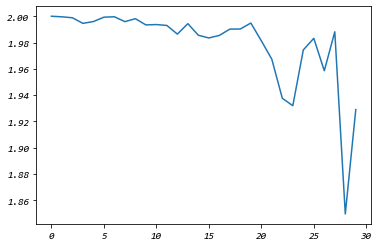

In [7]:
Pop_size = 1000
chomosome_size = 200
n = 2 #变量的个数
chomosome_length = int(chomosome_size/n)
mutation_rate = 0.1
loop = 30
RecycleResult = []
population = species_origin(Pop_size,chomosome_length)
xcoor = []
ycoor = []
# print('产生的种群:',population)
for i in range(loop):
    population_trans = translatior(population,chomosome_length)
    # print('基因编码转换为10进制:',population_trans)
    AdaptValue = AdaptFunc(population_trans,chomosome_length)
    RecycleResult.append(max(AdaptValue))
    # print('计算种群的适应值:',AdaptValue)
    chooseProbability = choose_probability(AdaptValue)
    CumulativeProbability = Cumulative_Probability(chooseProbability)
    # print('种群的累积概率分布:',CumulativeProbability)
    newPop=selection(population,CumulativeProbability)
    # print('产生的新种群',newPop)
    population = crossover(newPop,chomosome_length)
    # print('交叉操作后:',population)
    population = mutation(population,mutation_rate)
    # print('变异操作:',population)
print(RecycleResult)
plt.plot([i for i in range(len(RecycleResult))],RecycleResult)